In [1]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/05/28664524fcc67c078313d482bf25fe403e9399130622cfc89e185ec0abf6/yfinance-0.2.54-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 1.7 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 2.4 MB/s eta 0:00:02
     --- ------------------------------------ 0.3/3.0 MB 2.1 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 2

In [4]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', start=start_date, end=end_date)
data['Date'] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2024-02-27,138.910887,139.987022,138.004141,139.598419,22364000
1,2024-02-28,138.601992,138.781340,136.150793,136.937958,30628700
2,2024-02-29,137.854668,139.448931,137.077462,139.279541,35485000
3,2024-03-01,139.110169,139.498772,137.481028,137.585648,28522000
4,2024-03-04,136.051147,136.140836,132.384329,133.719528,43571500


In [5]:
df = data[['Date', 'Close']]

In [6]:
df.head()

Price,Date,Close
Ticker,,GOOG
0,2024-02-27,139.598419
1,2024-02-28,136.937958
2,2024-02-29,139.279541
3,2024-03-01,137.585648
4,2024-03-04,133.719528


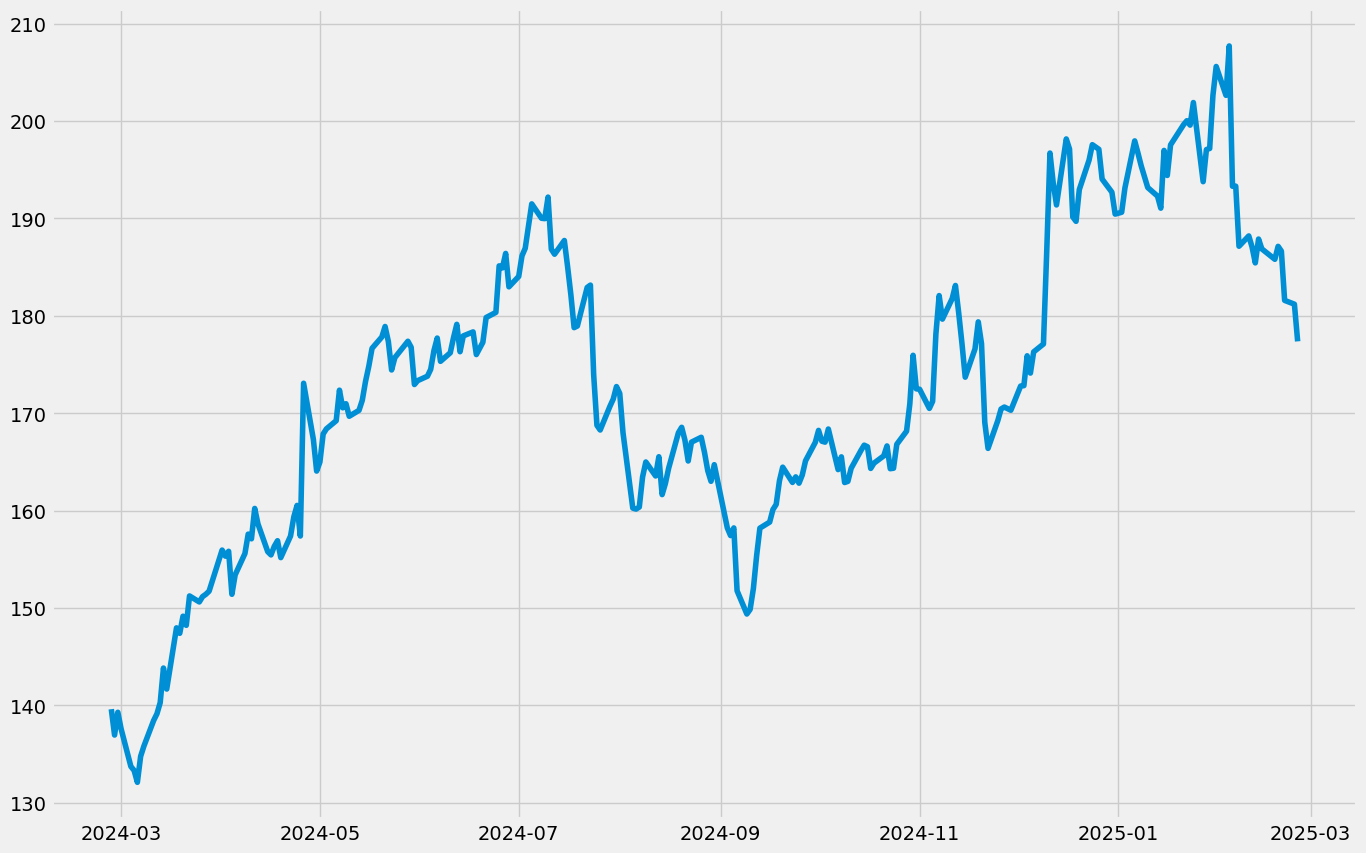

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(df['Date'], df['Close'])

In [10]:
!pip install statsmodels

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
result = seasonal_decompose(df['Close'], model='multiplicative', extrapolate_trend=30)
fig=plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None